In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
import os
import keras
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
train_dir = './data/asl_alphabet_train'
test_dir = './data/asl_alphabet_test'

In [3]:
# dict for mapping an integer for each class/label
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_data():
    images_list = []
    labels_list = []
    size = (64,64)
    
    for folder in os.listdir(train_dir):
        for imgfile in os.listdir(f'{train_dir}/{folder}'):
            curr_img = cv2.imread(f'{train_dir}/{folder}/{imgfile}')
            # resize image
            curr_img = cv2.resize(curr_img, size)
            # store into images and labels lists
            images_list.append(curr_img)
            labels_list.append(labels_dict[folder])

    # make np array
    images_arr = np.array(images_list)
    # normalize values
    images_arr = images_arr.astype('float32')/255.0
    # one hot encode labels
    labels_arr = keras.utils.to_categorical(labels_list)
    # split into training and testing data
    x_train, x_test, y_train, y_test = train_test_split(images_arr, labels_arr, test_size = 0.1)
    
    print(f'Loaded {len(x_train)} images for training')
    print(f'Training data shape: {x_train.shape}')
    print(f'Training labels shape: {y_train.shape}\n')
    print(f'Loaded {len(x_test)} images for testing')
    print(f'Testing data shape: {x_test.shape}')
    print(f'Testing labels shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test

In [5]:
x_train, x_test, y_train, y_test = load_data()

Loaded 78300 images for training
Training data shape: (78300, 64, 64, 3)
Training labels shape: (78300, 29)

Loaded 8700 images for testing
Testing data shape: (8700, 64, 64, 3)
Testing labels shape: (8700, 29)


In [6]:
from sklearn import metrics

nsamples, nx, ny, rgb = x_train.shape
new_x_train = x_train.reshape((nsamples, nx*ny*rgb))

testsamples, tx, ty, trgb = x_test.shape
new_x_test = x_test.reshape((testsamples, tx*ty*trgb))

In [7]:
new_y_test = []
num_dict = {'0':'A','1':'B','2':'C','3':'D', '4':'E', '5':'F','6':'G','7':'H', '8':'I', '9':'J', '10':'K', '11':'L', '12':'M',
                   '13':'N','14':'O', '15':'P', '16':'Q','17':'R','18':'S','19':'T','20':'U','21':'V','22':'W','23':'X','24':'Y',
                   '25':'Z', '26':'space', '27':'del', '28':'nothing'}
for x in range(0, len(y_test) - 1):
    value = y_test[x]
    for y in range(0, len(value) - 1):
        if value[y] == 1:
            new_y_test.append(num_dict[str(y)])
    if len(new_y_test) <= x:
        new_y_test.append(False)
new_y_test.append(False)
print(len(new_y_test))
print(len(y_test))

8700
8700


In [8]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
labels = ['A','B','C','D', 'E', 'F','G','H', 'I', 'J', 'K', 'L', 'M',
                   'N','O', 'P', 'Q','R','S','T','U','V','W','X','Y',
                   'Z', 'space', 'del', 'nothing']

neighbors = [5]
#for i in neighbors:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(new_x_train, y_train)
#y_trainpred = knn.predict(new_x_train)
#accuracy = metrics.accuracy_score(y_train, rftrain)
#print('\nAccuracy of training for {} decision trees: {}'.format(i, accuracy))

knntest = knn.predict(new_x_test)
testaccuracy = metrics.accuracy_score(y_test, knntest)
print('\nAccuracy of testing: {}'.format(testaccuracy))
precision = metrics.precision_score(y_test, knntest, average='micro')
print('\nPrecision of testing: {}'.format(precision))
recall = metrics.recall_score(y_test, knntest, average='micro')
print('\nRecall of testing: {}'.format(recall))

new_y_pred = []
for x in range(0, len(knntest) - 1):
    value = knntest[x]
    for y in range(0, len(value) - 1):
        if value[y] == 1:
            new_y_pred.append(num_dict[str(y)])
    if len(new_y_pred) <= x:
        new_y_pred.append(False)
new_y_pred.append(False)


Accuracy of testing: 0.9804597701149426

Precision of testing: 0.9864692957094946

Recall of testing: 0.9804597701149426


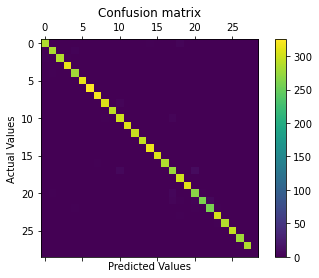

In [9]:
cm = confusion_matrix(new_y_test, new_y_pred, labels)
#cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [22]:
print(len(new_y_test))

8700


<AxesSubplot:>

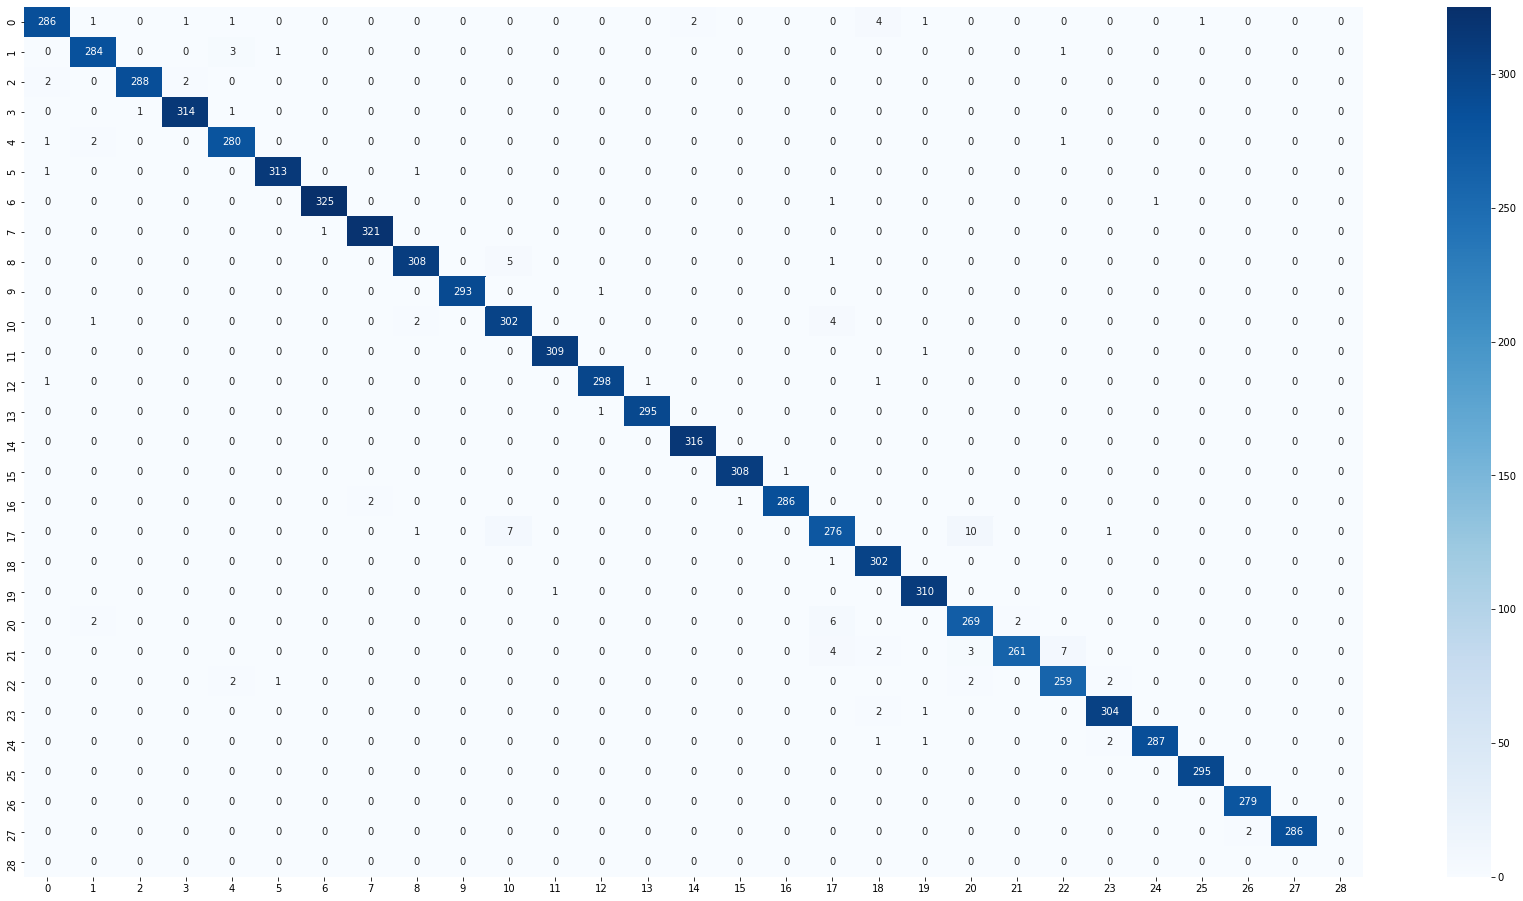

In [18]:
import seaborn as sns
plt.figure(figsize=(30, 16))
sns.heatmap(cm, annot=True, fmt='000', cmap='Blues')

In [18]:
print(new_y_test[0])

N


In [19]:
print(new_y_pred[0])

N


In [17]:
print(metrics.accuracy_score(new_y_test, new_y_pred))

0.9816091954022989


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(new_x_train, y_train)
y_trainpred = knn.predict(new_x_train)
accuracy = metrics.accuracy_score(y_train, y_trainpred)
print('\nAccuracy of training : {}'.format(accuracy))

KeyboardInterrupt: 

In [60]:
#trainknn = KNeighborsClassifier(n_neighbors=282)
#trainknn = trainknn.fit(new_x_train, y_train)
#y_trainpred = trainknn.predict(new_x_train)
#accuracy = metrics.accuracy_score(y_train, ytrain)
#print('\nAccuracy of training: {}'.format(i, accuracy))
knn = KNeighborsClassifier(n_neighbors=282)
knn = knn.fit(new_x_train, y_train)

knntest = knn.predict(new_x_test)
testaccuracy = metrics.accuracy_score(y_test, knntest)
print('\nAccuracy of testing: {}'.format(testaccuracy))
precision = metrics.precision_score(y_test, knntest, average='micro')
print('\nPrecision of testing: {}'.format(precision))
recall = metrics.recall_score(y_test, knntest, average='micro')
print('\nRecall of testing: {}'.format(recall))


Accuracy of testing: 0.16954022988505746

Precision of testing: 0.7829087048832272

Recall of testing: 0.16954022988505746


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

trees = [10, 50, 100]
for i in trees:
    rf = RandomForestClassifier(n_estimators=i)
    rf = rf.fit(new_x_train, y_train)
    #rftrain = rf.predict(new_x_train)
    #accuracy = metrics.accuracy_score(y_train, rftrain)
    #print('\nAccuracy of training for {} decision trees: {}'.format(i, accuracy))
    
    rftest = rf.predict(new_x_test)
    testaccuracy = metrics.accuracy_score(y_test, rftest)
    print('\nAccuracy of testing: {}'.format(testaccuracy))
    precision = metrics.precision_score(y_test, rftest, average='micro')
    print('\nPrecision of testing: {}'.format(precision))
    recall = metrics.recall_score(y_test, rftest, average='micro')
    print('\nRecall of testing: {}'.format(recall))


Accuracy of testing: 0.8975862068965518

Precision of testing: 0.9969360398314822

Recall of testing: 0.8975862068965518

Accuracy of testing: 0.9331034482758621

Precision of testing: 0.9990155057839035

Recall of testing: 0.9331034482758621

Accuracy of testing: 0.9362068965517242

Precision of testing: 0.9988962472406181

Recall of testing: 0.9362068965517242


In [6]:
new_y_train = []
num_dict = {'0':'A','1':'B','2':'C','3':'D', '4':'E', '5':'F','6':'G','7':'H', '8':'I', '9':'J', '10':'K', '11':'L', '12':'M',
                   '13':'N','14':'O', '15':'P', '16':'Q','17':'R','18':'S','19':'T','20':'U','21':'V','22':'W','23':'X','24':'Y',
                   '25':'Z', '26':'space', '27':'del', '28':'nothing'}
for x in range(0, len(y_train) - 1):
    value = y_train[x]
    for y in range(0, len(value) - 1):
        if value[y] == 1:
            new_y_train.append(num_dict[str(y)])
    if len(new_y_train) <= x:
        new_y_train.append(False)
new_y_train.append(False)
print(len(new_y_train))
print(len(y_train))

78300
78300


In [33]:
# Decision Tree with AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base = [10]
for i in base:
    model = DecisionTreeClassifier()
    abc = AdaBoostClassifier(n_estimators=i, base_estimator=model) 
    abc = abc.fit(new_x_train, new_y_train)
    #abctrain = abc.predict(new_x_train)
    #accuracy = metrics.accuracy_score(y_train, abctrain)
    #print('\nAccuracy of training for base classifier {}: {}'.format(i, accuracy))
    
    abctest = abc.predict(new_x_test)
    #testaccuracy = metrics.accuracy_score(y_test, abctest)
    #print('\nAccuracy of testing or base classifier {}: {}'.format(i, testaccuracy))
    precision = metrics.precision_score(y_test, abctest, average='micro')
    print('\nPrecision of testing for base classifier {}: {}'.format(i, precision))
    recall = metrics.recall_score(y_test, abctest, average='micro')
    print('\nRecall of testing for base classifier {}: {}'.format(i, recall))

In [ ]:
model = DecisionTreeClassifier()
model = model.fit()

In [56]:
print(y_pred.shape)

(8700, 29)


In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
labels = ['A','B','C','D', 'E', 'F','G','H', 'I', 'J', 'K', 'L', 'M',
                   'N','O', 'P', 'Q','R','S','T','U','V','W','X','Y',
                   'Z', 'space', 'del', 'nothing']
#cm = confusion_matrix(y_test, y_pred, labels)
new_y_test = []
for x in y_test:
    for y in range(0, len(x) - 1):
        if x[y] == 1:
            new_y_test.append(num_dict[str(y)])
new_y_pred = []
for x in y_pred:
    for y in range(0, len(x) - 1):
        if x[y] == 1:
            new_y_pred.append(num_dict[str(y)])
cm = confusion_matrix(new_y_test, new_y_pred, labels)
#cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [8375, 8331]